In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import confusion_matrix

lab4 = pd.read_csv("EMOASemanticData.csv")
lab4

,Participant Code,Trial,Correctly Answerd,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,...,K fix,K dur,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,STUD-P01,Trial001,yes,33,15894369,23,9863210,2,416747,1,...,5,3015788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STUD-P02,Trial001,no,45,16776943,27,9346725,7,3565207,5,...,6,2948673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STUD-P03,Trial001,yes,41,11943779,26,8129800,4,1032671,1,...,7,2632285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STUD-P04,Trial001,yes,55,22215175,37,16711365,5,1854232,5,...,6,2815571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STUD-P05,Trial001,yes,24,10629981,15,5398827,1,399904,3,...,3,1249473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,STUD-P11,Trial005,no,29,10745558,20,8013096,1,366440,1,...,2,316199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,STUD-P12,Trial005,yes,26,8912917,17,3865009,4,2665604,2,...,2,366415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,STUD-P13,Trial005,no,54,12260893,29,6663119,2,583042,4,...,4,833075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,STUD-P14,Trial005,yes,38,9097022,15,3999012,2,449990,2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
lab4.tail()

,Participant Code,Trial,Correctly Answerd,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,...,K fix,K dur,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
70,STUD-P11,Trial005,no,29,10745558,20,8013096,1,366440,1,...,2,316199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,STUD-P12,Trial005,yes,26,8912917,17,3865009,4,2665604,2,...,2,366415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,STUD-P13,Trial005,no,54,12260893,29,6663119,2,583042,4,...,4,833075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,STUD-P14,Trial005,yes,38,9097022,15,3999012,2,449990,2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,STUD-P15,Trial005,no,33,11711915,18,5930752,2,449609,1,...,1,166696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
df = lab4[lab4.columns[6:]]

In [283]:
df

,Q dur,A fix,A dur,B fix,B dur,C fix,C dur,D fix,D dur,K fix,K dur,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,9863210,2,416747,1,3498659,2,616611,1,299874,5,3015788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9346725,7,3565207,5,2565588,2,466607,1,299810,6,2948673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8129800,4,1032671,1,199985,1,283242,2,432954,7,2632285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16711365,5,1854232,5,1600796,1,333097,1,283149,6,2815571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5398827,1,399904,3,3082239,3,1166091,0,0,3,1249473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,8013096,1,366440,1,316646,3,1082942,1,349840,2,316199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,3865009,4,2665604,2,533244,1,732945,0,0,2,366415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,6663119,2,583042,4,783463,0,0,0,0,4,833075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,3999012,2,449990,2,299922,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
lab4.head()

,Participant Code,Trial,Correctly Answerd,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,...,K fix,K dur,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,STUD-P01,Trial001,yes,33,15894369,23,9863210,2,416747,1,...,5,3015788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STUD-P02,Trial001,no,45,16776943,27,9346725,7,3565207,5,...,6,2948673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STUD-P03,Trial001,yes,41,11943779,26,8129800,4,1032671,1,...,7,2632285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STUD-P04,Trial001,yes,55,22215175,37,16711365,5,1854232,5,...,6,2815571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STUD-P05,Trial001,yes,24,10629981,15,5398827,1,399904,3,...,3,1249473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
t1 = lab4[lab4['Trial'] == "Trial001"]
t2 = lab4[lab4['Trial'] == "Trial002"]
t3 = lab4[lab4['Trial'] == "Trial003"]
t4 = lab4[lab4['Trial'] == "Trial004"]
t5 = lab4[lab4['Trial'] == "Trial005"]

t1.head()

,Participant Code,Trial,Correctly Answerd,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,...,K fix,K dur,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,STUD-P01,Trial001,yes,33,15894369,23,9863210,2,416747,1,...,5,3015788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STUD-P02,Trial001,no,45,16776943,27,9346725,7,3565207,5,...,6,2948673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STUD-P03,Trial001,yes,41,11943779,26,8129800,4,1032671,1,...,7,2632285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STUD-P04,Trial001,yes,55,22215175,37,16711365,5,1854232,5,...,6,2815571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STUD-P05,Trial001,yes,24,10629981,15,5398827,1,399904,3,...,3,1249473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
label = lab4['Trial']
features = lab4[['Total Fixation','Total Duration','Q fix','Q dur','A fix','A dur','B fix','B dur','C fix','C dur','D fix','D dur','K fix','K dur']]

t1 = features[label == "Trial001"]
t2 = features[label == "Trial002"]
t3 = features[label == "Trial003"]
t4 = features[label == "Trial004"]
t5 = features[label == "Trial005"]

t1

,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,B dur,C fix,C dur,D fix,D dur,K fix,K dur
0,33,15894369,23,9863210,2,416747,1,3498659,2,616611,1,299874,5,3015788
1,45,16776943,27,9346725,7,3565207,5,2565588,2,466607,1,299810,6,2948673
2,41,11943779,26,8129800,4,1032671,1,199985,1,283242,2,432954,7,2632285
3,55,22215175,37,16711365,5,1854232,5,1600796,1,333097,1,283149,6,2815571
4,24,10629981,15,5398827,1,399904,3,3082239,3,1166091,0,0,3,1249473
5,34,11756768,15,4332362,6,2649784,1,416579,2,833109,1,216580,1,366625
6,45,15994350,23,9313077,6,1965896,4,1366068,3,1132925,1,366528,1,199947
7,29,10379479,13,4098237,5,3282230,3,1049556,2,633095,1,233176,1,516493
8,56,13643686,7,1582799,11,2765775,2,216009,0,0,0,0,0,0
9,53,11077461,35,7430115,1,133196,6,1666121,2,366508,0,0,11,2316109


In [287]:
mean_of_trial1 = t1.mean()
mean_of_trial2 = t2.mean()
mean_of_trial3 = t3.mean()
mean_of_trial4 = t4.mean()
mean_of_trial5 = t5.mean()

mean_of_trial1


Total Fixation    4.106667e+01
Total Duration    1.350800e+07
Q fix             2.246667e+01
Q dur             7.228518e+06
A fix             4.533333e+00
A dur             1.710851e+06
B fix             3.200000e+00
B dur             1.589345e+06
C fix             1.533333e+00
C dur             5.153767e+05
D fix             8.666667e-01
D dur             2.453851e+05
K fix             4.333333e+00
K dur             1.550581e+06
dtype: float64

In [288]:
mean_of_trial2

Total Fixation    4.873333e+01
Total Duration    1.859000e+07
Q fix             1.240000e+01
Q dur             3.477663e+06
A fix             8.133333e+00
A dur             3.283259e+06
B fix             8.066667e+00
B dur             3.183297e+06
C fix             6.866667e+00
C dur             3.514427e+06
D fix             3.733333e+00
D dur             1.395178e+06
K fix             4.266667e+00
K dur             1.301802e+06
dtype: float64

In [289]:
mean_of_trial3

Total Fixation    4.993333e+01
Total Duration    1.601172e+07
Q fix             5.666667e+00
Q dur             1.416172e+06
A fix             1.020000e+01
A dur             3.978472e+06
B fix             1.220000e+01
B dur             3.926138e+06
C fix             6.200000e+00
C dur             1.906839e+06
D fix             6.200000e+00
D dur             2.054081e+06
K fix             8.666667e-01
K dur             2.275564e+05
dtype: float64

In [290]:
mean_of_trial4

Total Fixation    4.400000e+01
Total Duration    1.488996e+07
Q fix             2.093333e+01
Q dur             7.004836e+06
A fix             3.733333e+00
A dur             1.331888e+06
B fix             3.933333e+00
B dur             1.475275e+06
C fix             2.066667e+00
C dur             7.440889e+05
D fix             1.733333e+00
D dur             6.097877e+05
K fix             1.046667e+01
K dur             3.878679e+06
dtype: float64

In [291]:
mean_of_trial5

Total Fixation    5.353333e+01
Total Duration    1.771152e+07
Q fix             3.006667e+01
Q dur             1.000348e+07
A fix             2.666667e+00
A dur             1.055112e+06
B fix             2.200000e+00
B dur             7.519989e+05
C fix             1.800000e+00
C dur             6.775095e+05
D fix             1.466667e+00
D dur             4.864259e+05
K fix             2.266667e+00
K dur             6.230561e+05
dtype: float64

In [292]:
std_of_trial1 = t1.std()
std_of_trial2 = t2.std()
std_of_trial3 = t3.std()
std_of_trial4 = t4.std()
std_of_trial5 = t5.std()


In [293]:
std_of_trial1

Total Fixation    9.475281e+00
Total Duration    3.148859e+06
Q fix             8.131655e+00
Q dur             3.643891e+06
A fix             2.722044e+00
A dur             1.092834e+06
B fix             1.656157e+00
B dur             1.176217e+06
C fix             9.154754e-01
C dur             3.370771e+05
D fix             6.399405e-01
D dur             2.152244e+05
K fix             2.968084e+00
K dur             1.053583e+06
dtype: float64

In [294]:
std_of_trial2

Total Fixation    2.481781e+01
Total Duration    8.300198e+06
Q fix             7.835815e+00
Q dur             1.902799e+06
A fix             4.853080e+00
A dur             2.166553e+06
B fix             4.636296e+00
B dur             2.308793e+06
C fix             4.223517e+00
C dur             2.912568e+06
D fix             2.433888e+00
D dur             8.025690e+05
K fix             2.814926e+00
K dur             8.600986e+05
dtype: float64

In [295]:
std_of_trial3

Total Fixation    1.706068e+01
Total Duration    5.255463e+06
Q fix             2.742956e+00
Q dur             6.296640e+05
A fix             4.427189e+00
A dur             2.082598e+06
B fix             8.342661e+00
B dur             2.795638e+06
C fix             4.362175e+00
C dur             1.483419e+06
D fix             5.990469e+00
D dur             2.083394e+06
K fix             7.432234e-01
K dur             2.403296e+05
dtype: float64

In [296]:
std_of_trial4

Total Fixation    1.871592e+01
Total Duration    4.966683e+06
Q fix             1.219758e+01
Q dur             3.868668e+06
A fix             2.086236e+00
A dur             9.940245e+05
B fix             1.387015e+00
B dur             6.450903e+05
C fix             1.437591e+00
C dur             4.167103e+05
D fix             1.222799e+00
D dur             6.524920e+05
K fix             6.501282e+00
K dur             2.525912e+06
dtype: float64

In [297]:
std_of_trial5

Total Fixation    2.620214e+01
Total Duration    9.061146e+06
Q fix             1.746616e+01
Q dur             6.872387e+06
A fix             1.632993e+00
A dur             9.587691e+05
B fix             1.473577e+00
B dur             8.866073e+05
C fix             1.656157e+00
C dur             6.398196e+05
D fix             2.325838e+00
D dur             9.362121e+05
K fix             1.709915e+00
K dur             5.477544e+05
dtype: float64

In [298]:
def distance_of_mean(mean_of_trial1, mean_of_trial2):
    return np.linalg.norm(mean_of_trial1 - mean_of_trial2)
d1 = distance_of_mean(mean_of_trial1['Total Duration'], mean_of_trial2['Total Duration'])
d2 = distance_of_mean(mean_of_trial1['Total Duration'], mean_of_trial3['Total Duration'])
d3 = distance_of_mean(mean_of_trial1['Total Duration'], mean_of_trial4['Total Duration'])
d4 = distance_of_mean(mean_of_trial1['Total Duration'], mean_of_trial5['Total Duration'])
d5 = distance_of_mean(mean_of_trial2['Total Duration'], mean_of_trial3['Total Duration'])
d6 = distance_of_mean(mean_of_trial2['Total Duration'], mean_of_trial4['Total Duration'])
d7 = distance_of_mean(mean_of_trial2['Total Duration'], mean_of_trial5['Total Duration'])
d8 = distance_of_mean(mean_of_trial3['Total Duration'], mean_of_trial4['Total Duration'])
d9 = distance_of_mean(mean_of_trial3['Total Duration'], mean_of_trial5['Total Duration'])
d10 = distance_of_mean(mean_of_trial4['Total Duration'], mean_of_trial5['Total Duration'])
print(d1,"\n",d2,"\n",d3,"\n",d4,"\n",d5,"\n",d6,"\n",d7,"\n",d8,"\n",d9,"\n",d10)


5081990.6000000015 
 2503713.2666666657 
 1381958.7999999989 
 4203513.533333331 
 2578277.333333336 
 3700031.8000000026 
 878477.0666666701 
 1121754.4666666668 
 1699800.2666666657 
 2821554.7333333325


(array([ 3.,  5., 12., 10.,  5., 11.,  7.,  7.,  4.,  4.,  1.,  0.,  2.,
         2.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 17. ,  22.4,  27.8,  33.2,  38.6,  44. ,  49.4,  54.8,  60.2,
         65.6,  71. ,  76.4,  81.8,  87.2,  92.6,  98. , 103.4, 108.8,
        114.2, 119.6, 125. ]),
 <BarContainer object of 20 artists>)

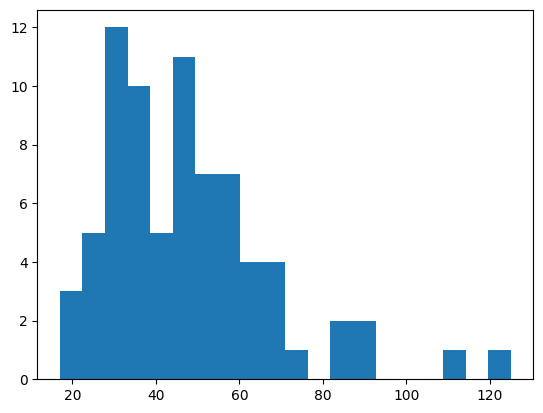

In [299]:
data1 = lab4[['Total Duration', 'Total Fixation']]
plt.hist(data1['Total Fixation'], bins=20)

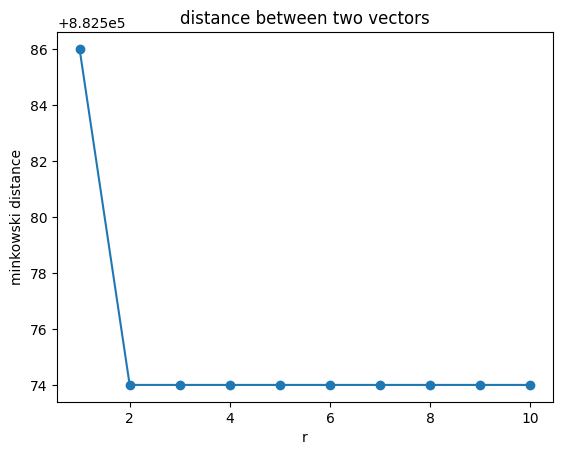

In [300]:
vector1 = lab4[['Total Fixation', 'Total Duration']].loc[0]
vector2 = lab4[['Total Fixation', 'Total Duration']].loc[1]

def distance_by_minkowski(v1,v2,r):
    return minkowski(v1,v2,r)

value_of_r = range(1,11)
dist = [distance_by_minkowski(vector1, vector2, r) for r in value_of_r]

plt.plot(value_of_r,dist, marker='o')
plt.xlabel('r')
plt.ylabel('minkowski distance')
plt.title('distance between two vectors')
plt.show()






In [301]:
X_train, X_test, Y_train, Y_test = train_test_split(features,label, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [302]:
knn.score(X_test, Y_test)

0.6

In [303]:
knn.predict(X_test)


array(['Trial004', 'Trial005', 'Trial005', 'Trial001', 'Trial003',
       'Trial005', 'Trial001', 'Trial001', 'Trial001', 'Trial005',
       'Trial002', 'Trial003', 'Trial004', 'Trial002', 'Trial005'],
      dtype=object)

In [304]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, Y_train)
knn2.score(X_test, Y_test)
knn2.predict(X_test)


array(['Trial004', 'Trial005', 'Trial001', 'Trial001', 'Trial003',
       'Trial005', 'Trial004', 'Trial004', 'Trial001', 'Trial005',
       'Trial002', 'Trial003', 'Trial004', 'Trial002', 'Trial001'],
      dtype=object)

In [306]:
y_pred = knn.predict(X_test)
confusion_matrix(Y_test, y_pred)


array([[2, 0, 0, 1, 2],
       [1, 1, 0, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 3]], dtype=int64)

In [308]:
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    print("k = ", i, "Accuracy: ", knn.score(X_test, Y_test))

k =  1 Accuracy:  0.6666666666666666
k =  2 Accuracy:  0.6666666666666666
k =  3 Accuracy:  0.6
k =  4 Accuracy:  0.6666666666666666
k =  5 Accuracy:  0.4
k =  6 Accuracy:  0.4666666666666667
k =  7 Accuracy:  0.3333333333333333
k =  8 Accuracy:  0.4
k =  9 Accuracy:  0.4
k =  10 Accuracy:  0.5333333333333333
k =  11 Accuracy:  0.4


In [310]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

    Trial001       0.50      0.40      0.44         5
    Trial002       0.50      0.50      0.50         2
    Trial003       1.00      0.67      0.80         3
    Trial004       0.50      1.00      0.67         1
    Trial005       0.60      0.75      0.67         4

    accuracy                           0.60        15
   macro avg       0.62      0.66      0.62        15
weighted avg       0.63      0.60      0.60        15



k = 1, Accuracy: 0.6666666666666666
k = 2, Accuracy: 0.6666666666666666
k = 3, Accuracy: 0.6
k = 4, Accuracy: 0.6666666666666666
k = 5, Accuracy: 0.4
k = 6, Accuracy: 0.4666666666666667
k = 7, Accuracy: 0.3333333333333333
k = 8, Accuracy: 0.4
k = 9, Accuracy: 0.4
k = 10, Accuracy: 0.5333333333333333
k = 11, Accuracy: 0.4


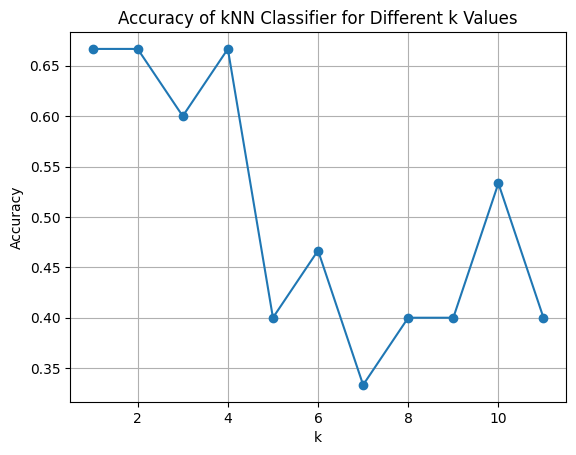

In [311]:
from sklearn.metrics import accuracy_score


# Prepare features and labels
features = lab4[['Total Fixation', 'Total Duration', 'Q fix', 'Q dur', 'A fix', 'A dur', 'B fix', 'B dur', 'C fix', 'C dur', 'D fix', 'D dur', 'K fix', 'K dur']]
labels = lab4['Trial']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize lists to store accuracy values
k_values = range(1, 12)
accuracies = []

# Loop over different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k = {k}, Accuracy: {accuracy}")

# Plot the accuracy against the values of k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.show()